In [2]:
#!pip install matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from collections import Counter
from sklearn.preprocessing import StandardScaler

# Reading the CSV file
dftrain = pd.read_csv('df_train_edgeproject.csv')
dftest = pd.read_csv('df_testedgeproject.csv')

In [3]:
dftest.head(n=5)
df_train = dftrain.iloc[:, 1:-1]
df_test = dftest.iloc[:,1:-1]

In [4]:
# Count rows with missing values
missing_rows_count_train = df_train.isnull().any(axis=1).sum()
print(f"Number of rows with missing values (train): {missing_rows_count_train}")

# Remove rows with missing values
df_train_clean = df_train.dropna()

# Count rows with missing values
missing_rows_count_test = df_test.isnull().any(axis=1).sum()
print(f"Number of rows with missing values (test): {missing_rows_count_test}")

# Remove rows with missing values
df_test_clean = df_test.dropna()

Number of rows with missing values (train): 37
Number of rows with missing values (test): 9


In [5]:
X_train = df_train_clean.drop(columns = 'activityID')
y_train = df_train_clean['activityID']

X_test = df_test_clean.drop(columns = 'activityID')
y_test = df_test_clean['activityID']


In [6]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# trying ridge regression (b/c of possible multicolinearity) 
maxiters=1000
logreg_ridge = LogisticRegression(penalty='l2', solver='lbfgs', multi_class='multinomial', random_state=42,max_iter=maxiters)
logreg_ridge.fit(X_train_scaled, y_train)

C:\Users\malco\.julia\conda\3\x86_64\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [8]:
logreg_ridge.score(X_train_scaled, y_train) #on the training set!!!

0.6922256949138188

In [9]:
logreg_ridge.score(X_test_scaled, y_test) #on the testing set!!!

0.49561543250118867

In [11]:
#just doing standard, unpelanlzied
maxiters=1000
logreg = LogisticRegression(penalty = None, random_state = 15072,max_iter=maxiters).fit(X_train_scaled, y_train)

In [12]:
logreg.score(X_train_scaled, y_train) #on the training set!!!

0.6921462971317449

In [13]:
logreg.score(X_test_scaled, y_test) #on the testing set

0.49546347991039696

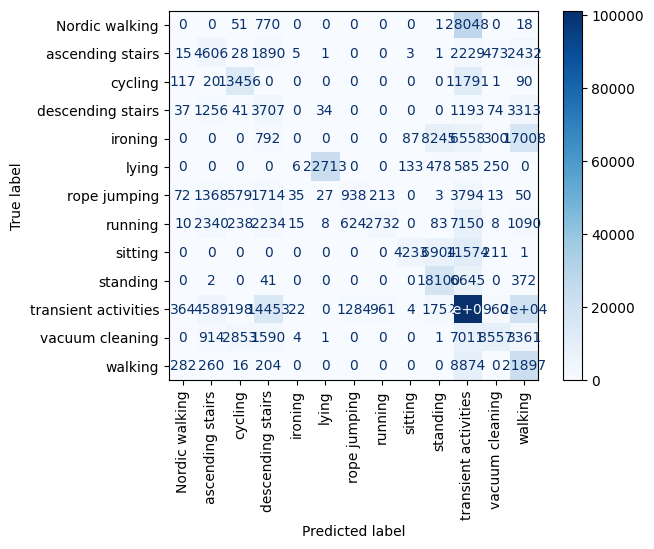

In [14]:
#conf matrix for normal log reg
# Predict on the test set
y_pred = logreg.predict(X_test_scaled)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap="Blues", xticks_rotation="vertical")  # Customize appearance

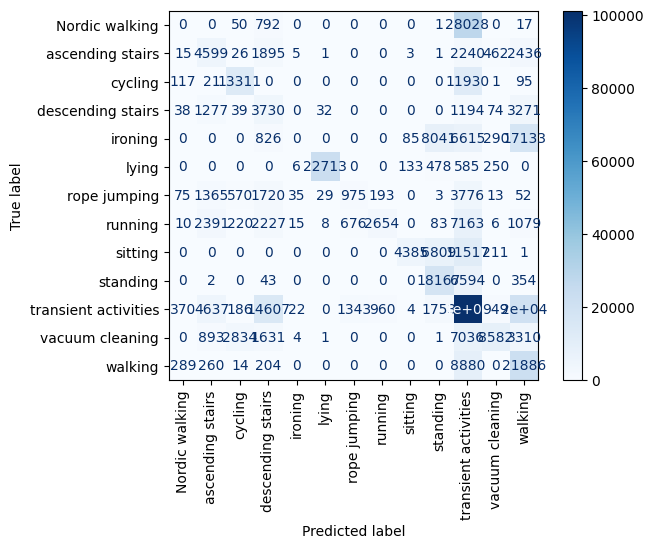

In [15]:
#conf matrix for ridge log reg
# Predict on the test set
y_pred_r = logreg_ridge.predict(X_test_scaled)

# Generate the confusion matrix
cm_r = confusion_matrix(y_test, y_pred_r)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_r, display_labels=logreg.classes_)
disp.plot(cmap="Blues", xticks_rotation="vertical")  # Customize appearance

In [60]:
count = Counter(y_pred)
print(count)
count_r = Counter(y_pred_r)
print(count_r)
#ridge makes literally zero difference
# it predicts transient activity 48.2 percent of the time
196778/sum((196778,69503,35337,27675,22784,17250,15445,10838,4610, 3807, 2994, 914, 87))

Counter({'transient activities': 196778, 'walking': 69503, 'standing': 35337, 'descending stairs': 27675, 'lying': 22784, 'cycling': 17250, 'ascending stairs': 15445, 'vacuum cleaning': 10838, 'sitting': 4610, 'running': 3807, 'rope jumping': 2994, 'Nordic walking': 914, 'ironing': 87})
Counter({'transient activities': 196778, 'walking': 69503, 'standing': 35337, 'descending stairs': 27675, 'lying': 22784, 'cycling': 17250, 'ascending stairs': 15445, 'vacuum cleaning': 10838, 'sitting': 4610, 'running': 3807, 'rope jumping': 2994, 'Nordic walking': 914, 'ironing': 87})


0.48227301469038436

In [55]:
count_train = Counter(y_train)
count_test = Counter(y_test)
print(count_train)
print(count_test)
# baseline accuracy (always predict 

# transient activities is by far the most common in the train set. Therefore, the baseline is to always predict transient activities for the test set. 
# The accuracy is just how often transient activities show up in the test set.

145920/sum((145920, 32990, 31533, 28888,  25475, 25160, 24292,  24165, 22923, 16532,  11683,  9655,  8806))
#baseline accuracy is 35.7%

Counter({'transient activities': 781609, 'walking': 207228, 'ironing': 205700, 'lying': 168358, 'standing': 164771, 'sitting': 162265, 'Nordic walking': 159219, 'vacuum cleaning': 151061, 'cycling': 139125, 'ascending stairs': 105533, 'descending stairs': 95289, 'running': 81667, 'rope jumping': 34163})
Counter({'transient activities': 145920, 'ironing': 32990, 'walking': 31533, 'Nordic walking': 28888, 'cycling': 25475, 'standing': 25160, 'vacuum cleaning': 24292, 'lying': 24165, 'sitting': 22923, 'running': 16532, 'ascending stairs': 11683, 'descending stairs': 9655, 'rope jumping': 8806})
